### Step 1 - Loading Data and Exploratory Analysis

First five rows of the dataset:
                                                text  exclude_gpt  \
0  TORRICELLI HOLDINGS LTD. ACCOUNT NUMBER : 6105...            0   
1                                      PREPARED FOR:            0   
2                      STATEMENT OF INVESTMENTS\n===            0   
3                                          31-Mar-24            0   
4  YOUR PORTFOLIO MANAGER Scott Guitard, BBA (Fin...            0   

   confidence_gpt  exclude_llama  svm_class  char_count  \
0        0.383237              0          0          74   
1        0.490521              0          1          13   
2        0.801490              0          0          28   
3        0.460641              0          0          14   
4        0.591784              0          0          88   

                     file  
0  Torricelli7.pdf.pickle  
1  Torricelli7.pdf.pickle  
2  Torricelli7.pdf.pickle  
3  Torricelli7.pdf.pickle  
4  Torricelli7.pdf.pickle  


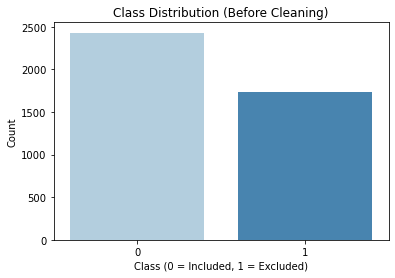

In [4]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'excerpt_relevance_classification_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Check the basic structure of the data
print("First five rows of the dataset:")
print(data.head())

# Initial class distribution plot (before cleaning)
plt.figure(figsize=(6, 4))
sns.countplot(x='exclude_gpt', data=data, palette='Blues')
plt.title("Class Distribution (Before Cleaning)")
plt.xlabel("Class (0 = Included, 1 = Excluded)")
plt.ylabel("Count")
plt.show()


### Step 2 - Data Cleaning

Removing duplicates

Class counts before removing duplicates:
0    2430
1    1732
Name: exclude_gpt, dtype: int64
Number of duplicate rows: 2272
Class counts after removing duplicates:
0    1384
1     506
Name: exclude_gpt, dtype: int64


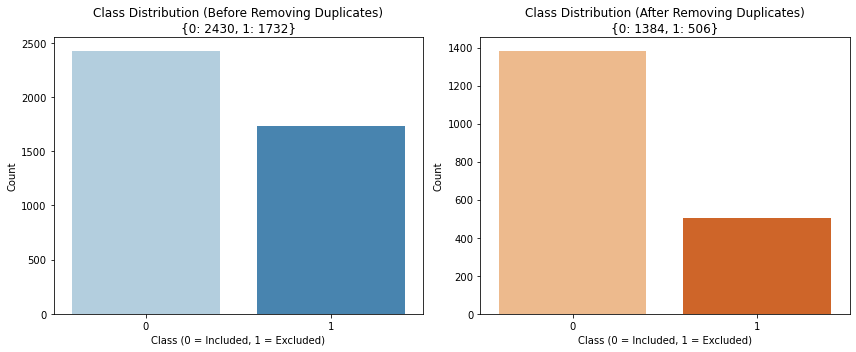

In [5]:
# Select the relevant columns for the analysis
selected_columns = data[['text', 'exclude_gpt']]

# Calculate the class counts before removing duplicates
class_counts_before = selected_columns['exclude_gpt'].value_counts()
print("Class counts before removing duplicates:")
print(class_counts_before)

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Class distribution before removing duplicates (Left)
sns.countplot(x='exclude_gpt', data=selected_columns, palette='Blues', ax=axes[0])
axes[0].set_title(f"Class Distribution (Before Removing Duplicates)\n{class_counts_before.to_dict()}")
axes[0].set_xlabel("Class (0 = Included, 1 = Excluded)")
axes[0].set_ylabel("Count")

# Check for duplicates in 'text' and 'exclude_gpt' columns
duplicate_rows = selected_columns.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates
cleaned_data = selected_columns.drop_duplicates()

# Calculate the class counts after removing duplicates
class_counts_after = cleaned_data['exclude_gpt'].value_counts()
print("Class counts after removing duplicates:")
print(class_counts_after)

# Class distribution after removing duplicates (Right)
sns.countplot(x='exclude_gpt', data=cleaned_data, palette='Oranges', ax=axes[1])
axes[1].set_title(f"Class Distribution (After Removing Duplicates)\n{class_counts_after.to_dict()}")
axes[1].set_xlabel("Class (0 = Included, 1 = Excluded)")
axes[1].set_ylabel("Count")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


Handling conflicting labels

Class counts before removing conflicts:
0    1384
1     506
Name: exclude_gpt, dtype: int64
Class counts after removing conflicts:
0    1354
1     476
Name: exclude_gpt, dtype: int64


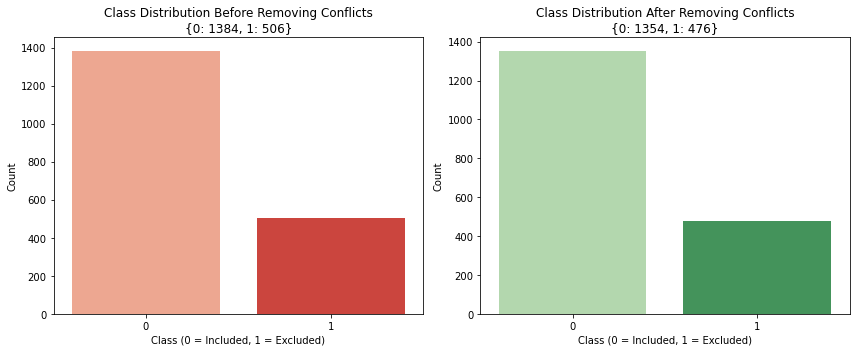

In [6]:
# Search for conflicting labels (same text with different exclude_gpt values)
conflicting_labels = cleaned_data.groupby('text')['exclude_gpt'].nunique()
conflicting_texts = conflicting_labels[conflicting_labels > 1].index

# Calculate the class counts before removing conflicts
class_counts_before_conflict = cleaned_data['exclude_gpt'].value_counts()
print("Class counts before removing conflicts:")
print(class_counts_before_conflict)

# Remove conflicting rows
conflicting_data = cleaned_data[cleaned_data['text'].isin(conflicting_texts)]
cleaned_data_no_conflicts = cleaned_data[~cleaned_data['text'].isin(conflicting_texts)]

# Calculate the class counts after removing conflicts
class_counts_after_conflict = cleaned_data_no_conflicts['exclude_gpt'].value_counts()
print("Class counts after removing conflicts:")
print(class_counts_after_conflict)

# Display the class distribution before and after removing conflicts (side by side)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot before removing conflicts
sns.countplot(x='exclude_gpt', data=cleaned_data, palette='Reds', ax=ax[0])
ax[0].set_title(f"Class Distribution Before Removing Conflicts\n{class_counts_before_conflict.to_dict()}")
ax[0].set_xlabel("Class (0 = Included, 1 = Excluded)")
ax[0].set_ylabel("Count")

# Plot after removing conflicts
sns.countplot(x='exclude_gpt', data=cleaned_data_no_conflicts, palette='Greens', ax=ax[1])
ax[1].set_title(f"Class Distribution After Removing Conflicts\n{class_counts_after_conflict.to_dict()}")
ax[1].set_xlabel("Class (0 = Included, 1 = Excluded)")
ax[1].set_ylabel("Count")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


### Step 3 - Split Data (80% Train, 20% Test)

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (0 for included, 1 for excluded)
label_encoder = LabelEncoder()
y_cleaned = label_encoder.fit_transform(cleaned_data_no_conflicts['exclude_gpt'])

# Apply TF-IDF Vectorization to the text column
tfidf = TfidfVectorizer(max_features=5000)
X_cleaned = tfidf.fit_transform(cleaned_data_no_conflicts['text']).toarray()

# Split the dataset into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


### Step 4 - Trainning Models

Epoch 1/10
46/46 [==============================] - 1s 7ms/step - loss: 0.4335 - accuracy: 0.7930 - val_loss: 0.1693 - val_accuracy: 0.9372
Epoch 2/10
46/46 [==============================] - 0s 4ms/step - loss: 0.1430 - accuracy: 0.9460 - val_loss: 0.1465 - val_accuracy: 0.9344
Epoch 3/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9720 - val_loss: 0.1500 - val_accuracy: 0.9454
Epoch 4/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9781 - val_loss: 0.1706 - val_accuracy: 0.9454
Epoch 5/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9891 - val_loss: 0.1679 - val_accuracy: 0.9481
Epoch 6/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9877 - val_loss: 0.1909 - val_accuracy: 0.9426
Epoch 7/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9911 - val_loss: 0.1858 - val_accuracy: 0.9481
Epoch 8/10
46/46 [==

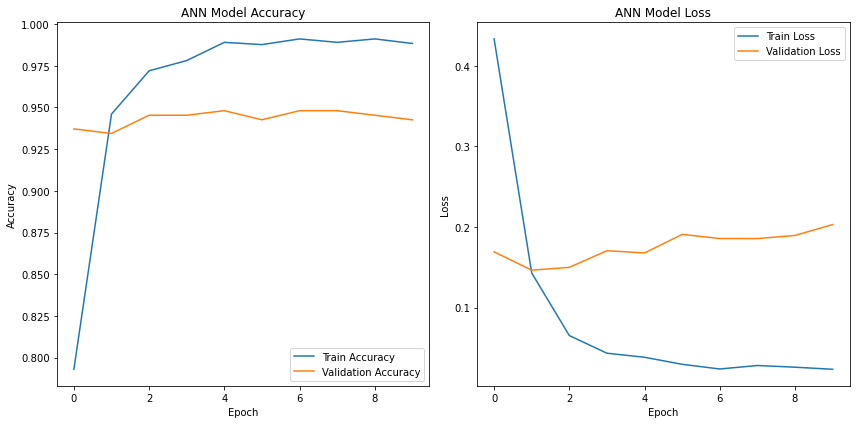

12/12 [==============================] - 0s 1ms/step
Confusion Matrix - ANN Model


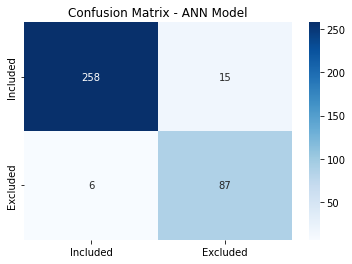

Classification Report - ANN Model
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       273
           1       0.85      0.94      0.89        93

    accuracy                           0.94       366
   macro avg       0.92      0.94      0.93       366
weighted avg       0.95      0.94      0.94       366



In [8]:

import tensorflow as tf

# Build the ANN model
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save history for performance analysis
ann_history = ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predict using the ANN model
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Display the confusion matrix and classification report for ANN
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
class_report_ann = classification_report(y_test, y_pred_ann)

print("Confusion Matrix - ANN Model")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['Included', 'Excluded'], yticklabels=['Included', 'Excluded'])
plt.title("Confusion Matrix - ANN Model")
plt.show()

print("Classification Report - ANN Model")
print(class_report_ann)


### 5 - Saving Models and Inference

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
import joblib

# Assuming `cleaned_data_no_conflicts` is already defined and contains your cleaned data
# Select relevant columns
X = cleaned_data_no_conflicts['text']
y = cleaned_data_no_conflicts['exclude_gpt']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom ANN classifier compatible with sklearn pipelines
class ANNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self.input_dim = None  # Input dimension will be set after TF-IDF

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, input_dim=self.input_dim, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.input_dim = X.shape[1]  # Set input_dim based on the TF-IDF output shape
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        y_pred = (self.model.predict(X) > 0.5).astype("int32")
        return y_pred

    def predict_proba(self, X):
        proba = self.model.predict(X)
        return np.hstack([1-proba, proba])  # return probabilities for both classes

# Step 1: Build a pipeline with TF-IDF and ANN
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # This will dynamically determine the feature count
    ('ann', ANNClassifier(epochs=10, batch_size=32))  # No fixed input_dim here
])

# Step 2: Train the pipeline using the cleaned data
pipeline.fit(X_train, y_train)

# Step 3: Save the pipeline
joblib.dump(pipeline, 'text_classification_ann_pipeline_cleaned.pkl')
print("Pipeline with ANN model saved as text_classification_ann_pipeline_cleaned.pkl")


Epoch 1/10


InvalidArgumentError: Graph execution error:

TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "c:\Users\abden\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    return func(device, token, args)

  File "c:\Users\abden\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 147, in __call__
    outputs = self._call(device, args)

  File "c:\Users\abden\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 154, in _call
    ret = self._func(*args)

  File "c:\Users\abden\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\abden\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 513, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "c:\Users\abden\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 513, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "c:\Users\abden\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 509, in slice_array
    return training_utils.slice_arrays(

  File "c:\Users\abden\anaconda3\lib\site-packages\keras\engine\training_utils.py", line 47, in slice_arrays
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

  File "c:\Users\abden\anaconda3\lib\site-packages\keras\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

  File "c:\Users\abden\anaconda3\lib\site-packages\keras\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_4568]

loading the model for inference

In [ ]:
import joblib
import pandas as pd

# Load the saved pipeline
pipeline = joblib.load('text_classification_ann_pipeline_cleaned.pkl')

y_pred = pipeline.predict(X_test)

# Optionally, get prediction probabilities (for binary classification)
y_prob = pipeline.predict_proba(X_test)

# Output predictions and probabilities for a few samples
for i in range(5):
    print(f"Text: {X_test.iloc[i]}")
    print(f"Prediction: {y_pred[i]} (0 = Included, 1 = Excluded)")
    print(f"Probability: {y_prob[i]}")
    print('-' * 50)

# If you want to evaluate the performance of the model, you can calculate accuracy or other metrics
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_test contains the true labels
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report for precision, recall, F1-score, etc.
print("Classification Report:")
print(classification_report(y_test, y_pred))


KeyError: 27

Example

In [2]:
import joblib

# Step 1: Load the saved pipeline
pipeline = joblib.load('text_classification_ann_pipeline_cleaned.pkl')

# Step 2: Prepare the custom input text
new_text = ["U.S. EQUITIES -- $302,782.81 INTERNATIONAL EQUITIES -- $238,204.06,0,0.589636538"]

# Step 3: Use the pipeline to predict the class
prediction = pipeline.predict(new_text)

# Step 4: Get the probability of the prediction
probability = pipeline.predict_proba(new_text)

# Step 5: Output the results with explicit labels
print(f"Input Text: {new_text[0]}")
print(f"Prediction: {prediction[0]} (0 = Included, 1 = Excluded)")
print(f"Probability of Included Class (0): {probability[0][0]}")
print(f"Probability of Excluded Class (1): {probability[0][1]}")


KeyError: 27